# Part A: Dataset and Significance Test Selection

## Dataset
The dataset selected for this analysis is the **Stroke Prediction Dataset**.

### Prerequisites
1. Follow this [link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) to download the dataset.
2. Upload it into the default directory (content folder).

## Introduction
- Obtained from Kaggle  
  URL: [https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)
- Composition:  
  The dataset contains a mix of:
  - Numeric variables such as:
    - Age
    - Glucose levels
    - BMI
    - Work type, etc.
  - Categorical variables such as:
    - Gender
    - `ever_married` (indicates whether an individual has ever been married)

- Objective:  
  To predict how likely an individual is to experience a stroke based on their demographic, lifestyle, and medical information.

## Acknowledgement
To uphold research integrity, full credit is given to the dataset author, **Fedesoriano**, a Data Scientist at Kaggle.  


In [ ]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Evaluation of the Dataset

### Columns Overview
The dataset consists of **12 columns**, as follows:

1. **ID**
2. **Gender**
3. **Age**
4. **Hypertension**: Number of times the person experienced hypertension.
5. **Heart_disease**: Number of times the person experienced heart disease.
6. **Ever_married**: Whether the person has ever been married.
7. **Work_type**: Type of work the person has undertaken:
   - Private
   - Self-employed
   - Retired
   - Never worked
   - Children
   - Government job
8. **Residence_type**: Either rural or urban area.
9. **Avg_glucose_level**: Average glucose level in the blood.
10. **BMI**: Body Mass Index.
11. **Smoking_status**:
    - "Formerly smoked"
    - "Never smoked"
    - "Smokes"
    - "Unknown"
12. **Stroke**: Binary field:
    - `1`: The patient experienced a stroke.
    - `0`: The patient did not experience a stroke.

### Data Overview
- The dataset contains **5110 rows** in total.
- Only the **BMI** column contains null entries.

### Handling Missing Data
- A conscious decision has been made **not to handle the null entries in the BMI column**, as BMI will not be used in the analysis. This ensures that the analysis is focused and unaffected by missing values in irrelevant columns.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


### Dataset Justification

1. **Relevance to Research Question**
   - The dataset contains a mix of continuous variables (e.g., `avg_glucose_level`, `age`, `bmi`) and categorical variables (e.g., `stroke`, `work_type`, `gender`), offering a stable base to analyse health factors related to stroke.
   - The variable `avg_glucose_level` aligns directly with the research question:  
     *"Do patients who had a stroke have higher average glucose levels than those who did not?"*

2. **Data Usability and Structure**
   - Contains over **5,000 rows**, the dataset is robust and meets the requirement of having at least 100 rows.
   - Minimal preprocessing is needed, which ensures focus on the core analysis rather than data cleaning.

3. **Diverse Applications**<br>
   The mix of numerical and categorical variables supports various methodologies

4. **Practical Importance**<br>
   Understanding the link between glucose levels and stroke occurrence has **real-world implications** for public health. Insights from this dataset could inform preventative medical care.

5. **Balance Between Complexity and Clarity**<br>
   Although the dataset is slightly imbalanced (with **4.9% of cases being strokes**), the imbalance reflects real-world distributions, adding authenticity.

In [ ]:
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

### Dataset composition

Below are the key variables that will be used in my analysis.

| **Column Name**       | **Type**      | **Description**                                   |
|------------------------|---------------|---------------------------------------------------|
| `avg_glucose_level`    | Continuous    | Average glucose level in blood                   |
| `stroke`               | Categorical   | Whether the patient had a stroke (1 = Yes, 0 = No) |


###Statistical analysis
**Avg_glucose_level:** Mean: 106.15, with a wide range (55.12 to 271.74). Standard deviation: 45.28 indicates high variability.
"Higher glucose levels could potentially relate to stroke occurrence, as extreme values are present."<br>

The dataset's imbalance, with only 4.9% of cases involving stroke, may affect statistical power by reducing the effective sample size in the stroke group.

##Interpretation

### Structure of Hypothesis

#### Research Question:
*Do patients who had a stroke have higher average glucose levels than those who did not?*

#### Hypotheses:
- **Null Hypothesis (H<sub>0</sub>):**  
  There is no significant difference in average glucose levels between patients who had a stroke and those who did not.

- **Alternative Hypothesis (H<sub>1</sub>):**  
  Patients who had a stroke have significantly higher average glucose levels than those who did not.

This is a **one-tailed test** because the hypothesis specifically predicts that glucose levels are higher for stroke patients.

###Key variables
| **Variable Name**      | **Type**           | **Role**                                  |
|-------------------------|--------------------|-------------------------------------------|
| `avg_glucose_level`     | Continuous         | Dependent variable (outcome to compare).  |
| `stroke`                | Categorical (binary) | Independent variable (defining groups).   |


### Data Visualisation: Glucose Levels by Stroke Status

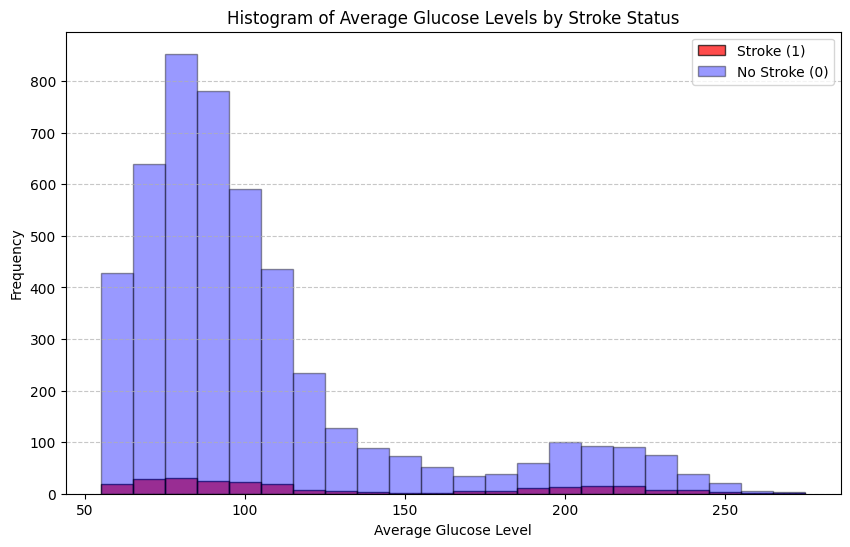

In [ ]:
import matplotlib.pyplot as plt

# Split data into stroke and non-stroke
stroke_group = df[df['stroke'] == 1]['avg_glucose_level']
non_stroke_group = df[df['stroke'] == 0]['avg_glucose_level']

# Define the bin edges for consistent comparison
bins = range(int(df['avg_glucose_level'].min()), int(df['avg_glucose_level'].max()) + 10, 10)

# Create the histogram
plt.figure(figsize=(10, 6))

# Histogram for stroke group
plt.hist(stroke_group, bins=bins, alpha=0.7, label='Stroke (1)', color='red', edgecolor='black')

# Histogram for non-stroke group
plt.hist(non_stroke_group, bins=bins, alpha=0.4, label='No Stroke (0)', color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Average Glucose Levels by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Parametric vs. Non-Parametric Discussion

#### Key Considerations for Parametric Tests:
1. **Normality:**  
   - Glucose levels in both groups should follow a normal distribution.  
   - The **Shapiro-Wilk test** will be used to check if data is normally distributed.
   
2. **Equal Variance:**  
   - Variance in glucose levels should be approximately equal across the two groups.  
   - This will be tested using **Levene's test**.

3. **Independence:**  
   - Observations must be independent.  
   - This point is satisfied as each patient is represented only once in the dataset.

#### Decision Based on Considerations:
- If assumptions are met:<br>
  **Independent t-test** will be used (parametric).

- If assumptions are violated:<br>
  **Mann-Whitney U-test** will be used (non-parametric) to account for deviations from normality or unequal variances.

#### Normality Check


In [ ]:
from scipy.stats import shapiro

# Test for normality
print("Shapiro-Wilk Test for Stroke Group:")
test_stat, p_value = shapiro(stroke_group)
print(f"Stat: {test_stat}, p-value: {p_value}")

print("\nShapiro-Wilk Test for Non-Stroke Group:")
test_stat, p_value = shapiro(non_stroke_group)
print(f"Stat: {test_stat}, p-value: {p_value}")

Shapiro-Wilk Test for Stroke Group:
Stat: 0.8712362980791762, p-value: 1.2319525411457356e-13

Shapiro-Wilk Test for Non-Stroke Group:
Stat: 0.8036442898805125, p-value: 1.1475284768113121e-60


#### Equal Variance Check

In [ ]:
from scipy.stats import levene

# Test for equal variance
stat, p_value = levene(stroke_group, non_stroke_group)
print(f"Levene’s Test: {stat}, p-value: {p_value}")

Levene’s Test: 94.10850460562769, p-value: 4.625275752785231e-22


#### Findings and Conclusions

1. **Normality Check (Shapiro-Wilk Test):**
   - **Stroke Group:**
     - Stat: 0.871, p-value: 1.23 * 10<sup>-13</sup>
   - **Non-Stroke Group:**
     - Stat: 0.804, p-value: 1.15 * 10<sup>-60</sup>
   - **Conclusion:**  
     Both p-values are less than 0.05, showing that neither group follows a normal distribution.  
     The assumption of normality is **violated**.

2. **Equal Variance Check (Levene's Test):**
   - Stat: 94.11, p-value: 4.63 * 10<sup>-22</sup>
   - **Conclusion:**  
     The p-value is less than 0.05, indicating that the variances in glucose levels between the two groups are significantly different.  
     The assumption of equal variances for parametric tests is **violated**.

3. **Test Decision:**
   - **Mann-Whitney U-test** was chosen as the appropriate alternative to the Independent t-test due to:
     - Violations of normality in both groups.
     - Major differences in variance between the groups.
   - The Mann-Whitney U-test:
     - Compares the medians of the dependent variable (`avg_glucose_level`) between the two independent groups (`stroke` = 1 and `no stroke` = 0).
     - Does not require assumptions of normality or equal variance, making it suitable for this dataset.
     - It remains valid by ranking data and comparing rank totals, rather than raw values.

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U-test
u_statistic, p_value = mannwhitneyu(stroke_group, non_stroke_group, alternative='greater')

# Display results
print(f"U-stat: {u_statistic}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Stroke patients have significantly higher average glucose levels.")
else:
    print("There is no significant difference in average glucose levels between stroke and non-stroke patients.")

U-stat: 739150.0
P-value: 1.8201836355446618e-09
Stroke patients have significantly higher average glucose levels.


### Conclusions

#### Statistical Results
- **U-stat:** 739,150.0  
- **P-value:** 1.82 × 10⁻⁹  
- The extremely small p-value (< 0.05) indicates that the difference observed between average glucose levels in stroke and non-stroke patients is highly unlikely to have occurred by accident.

#### Decision
- Since the p-value is less than 0.05, we **can reject the null hypothesis**.
- This shows a statistically significant difference in average glucose levels between the two groups.

#### Probability Theory in Context
- The **p-value** represents the probability of observing the data, assuming the null hypothesis (no difference in glucose level) is true.
- A p-value of **1.82 * 10<sup>-9</sup>** means there is a 0.000000182% chance that the observed result is due to random variation.
- The **U-stat** (739,150.0) calculates the rank-sum difference between the groups, where higher ranks for stroke patients indicate a trend toward higher glucose levels.

#### Implications
1. **Glucose Levels and Stroke Risk:**
   - Stroke patients have significantly higher glucose levels, suggesting an association between them.
   - This finding aligns with existing medical research linking high glucose levels to vascular health issues and stroke risk.

2. **Clinical Application:**
   - Monitoring glucose plays a vital role in stroke prevention.
   - Elevated glucose levels are used as an early indicator for prevention in individuals who are prone to stroke.

3. **Limitations of the Test:**
   - **Causation:** The Mann-Whitney U-test identifies an association but does not establish causation. Further research is necessary to confirm whether high glucose levels directly contribute to stroke risk.
   - **Other Variables:** e.g., age, hypertension, heart disease may influence both glucose levels and stroke risk and they were not controlled in this analysis.
   - **Data Imbalance:** The dataset contains significantly fewer stroke cases compared to non-stroke cases, which could impact robust results.

#### Future Ideas
- Use additional datasets to validate findings and ensure their usability towards larger groups of people.
- Conduct logistic regression to identify and investigate potential interacting variables.

#Part B: Machine Learning models







In [ ]:
import pandas as pd

# Load the dataset
apple_data = pd.read_csv("Apple_Quality.csv")

# Inspect the dataset
print(apple_data.info())
print(apple_data.describe())
print(apple_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%

In [ ]:
# Convert Acidity to float
apple_data['Acidity'] = pd.to_numeric(apple_data['Acidity'], errors='coerce')

print(apple_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB
None


In [ ]:
# Encode the Quality column as numeric
apple_data['Quality_numeric'] = apple_data['Quality'].apply(lambda x: 1 if x == 'good' else 0)

# Show transformation
print(apple_data[['Quality', 'Quality_numeric']].head())

  Quality  Quality_numeric
0    good                1
1    good                1
2     bad                0
3    good                1
4    good                1


### Data Pre-processing
- **Check for Missing or Invalid Data:**<br>
Most columns have only a single missing entry, which means it can safely be dropped.
- **Convert columns to numeric:**<br>
  - For some reason, the acidity column is of type object rather than float despite strictly numeric values. This has been converted to float.
  - `Quality` column is clearly categorical and can remain as an object data type. The categorical version was kept in case it is required and a new column was created as `Quality_numeric` (binary) to be handled by models correctly.

In [ ]:
# Check for missing values
print("Missing values per column:")
print(apple_data.isnull().sum())

# Drop missing values
apple_data = apple_data.dropna()

Missing values per column:
A_id               1
Size               1
Weight             1
Sweetness          1
Crunchiness        1
Juiciness          1
Ripeness           1
Acidity            1
Quality            1
Quality_numeric    0
dtype: int64


## Linear Regression Analysis

### What is Linear Regression?

Linear regression is a **fundamental supervised machine learning algorithm** used for modeling the relationship between:
- **Independent variable(s)** (features or predictors).
- **Dependent variable** (target or outcome).

The goal is to find a **line of best fit** that minimizes the error (residuals) between predicted and actual values, enabling predictions for unseen data.

---

### Key Concepts

#### 1. **The Regression Equation**:
The relationship is expressed using the linear equation:
$$
y = \beta_0 + \beta_1x + \epsilon
$$
Where:
- \(y\): Dependent variable (predicted outcome).
- \(x\): Independent variable (predictor).
- \($\beta_0$\): Intercept, the value of \(y\) when \(x = 0\).
- \($\beta_1$\): Slope, indicating how much \(y\) changes for a one-unit increase in \(x\).
- \($\epsilon$\): Error term, representing the difference between predicted and actual values.

#### 2. **Objective**:
The objective is to minimize the **sum of squared residuals**:
$$
\text{Residual} = y_i - \hat{y}_i
$$
By minimising these residuals, the model ensures the best fit to the data.

#### 3. **Types of Linear Regression**:
- **Simple Linear Regression**: Involves one independent variable.
- **Multiple Linear Regression**: Involves two or more independent variables.

### Applications of Linear Regression
Linear regression is widely used for predicting outcomes, such as housing prices, stock prices, product quality.

### Assumptions of Linear Regression
For accurate results, this method assumes:
1. **Linearity**: A linear relationship exists between \(x\) and \(y\).
2. **Independence**: Observations are independent of one another.
3. **Normality**: Residuals are normally distributed.

### Visualisation
**Scatter plot** to show the relationship between an independent feature and the dependent variable (`Quality`). The line of best fit helps identify:
- positive or negative relationships.
- strength of the relationship.
- outliers.

### Data Splitting

To evaluate the performance of our models, the dataset was split into **training** and **testing** sets:
- **Training Set (80%)**: Used to train the model and fit the regression line.
- **Testing Set (20%)**: Used to evaluate the model's performance on unseen data.

1. Features:
   - Independent variables: `Size`, `Weight`, `Sweetness`, `Crunchiness`, `Juiciness`, `Ripeness`, and `Acidity`.
   - These columns represent characteristics of apples.
2. Target:
   - Dependent variable: `Quality` (categorical: good/bad).

#### Importance of Splitting
Splitting ensures that:
- overfitting is reduced.
- performance is tested on unseen data, which gives an unbiased evaluation of the model.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features
X = apple_data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]  # Predictor columns
y = apple_data['Quality_numeric']  # Target column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print split shapes
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (3200, 7)
Testing feature set shape: (800, 7)
Training target set shape: (3200,)
Testing target set shape: (800,)


### Splitting Results

After splitting the dataset:
- **Training Feature Set**: 3200 samples with 7 features.
- **Testing Feature Set**: 800 samples with 7 features.
- **Training Target Set**: 3200 samples.
- **Testing Target Set**: 800 samples.

This confirms that 80% of the data was allocated for training and 20% for testing. The split ensures enough data for both model training and evaluation and is common practice in the industry.

In [ ]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Use the encoded Quality column for numeric target
y_train_numeric = y_train  # Assuming y_train is already the 'Quality_numeric' column

# Initialize a dictionary to store results
results = {}

# Loop through each feature and calculate linear regression statistics
for feature in X_train.columns:
    slope, intercept, r_value, p_value, std_err = linregress(X_train[feature], y_train_numeric)
    results[feature] = {"r_value": abs(r_value), "slope": slope, "intercept": intercept}

# Find the feature with the highest absolute r_value
best_feature = max(results, key=lambda x: results[x]["r_value"])
print(f"Best predictor: {best_feature} with r_value = {results[best_feature]['r_value']}")

Best predictor: Ripeness with r_value = 0.2584355484154438


### Analysis
The result shows that `Ripeness` is the best predictor for the target variable `Quality` with an *r-value of approximately 0.258*. While it indicates a weak positive linear relationship, it is the strongest predictor from all the features in the dataset.

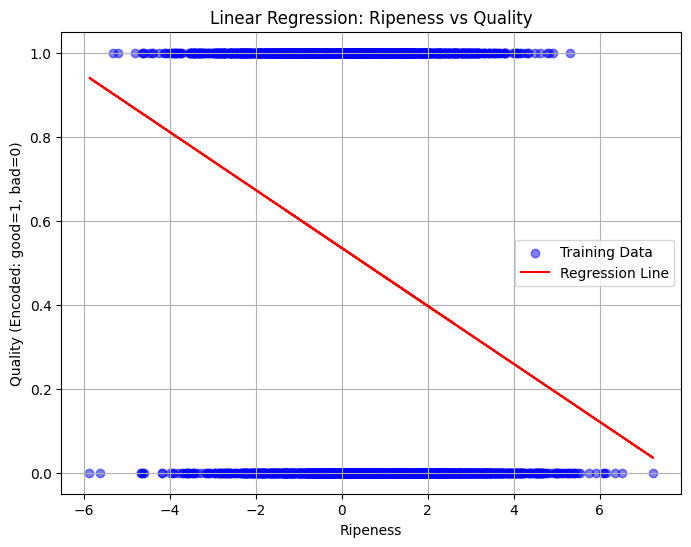

In [ ]:
# Scatter plot with regression line for the best predictor
plt.figure(figsize=(8, 6))

# Scatter plot for data points
plt.scatter(X_train[best_feature], y_train_numeric, alpha=0.5, label='Training Data', color='blue')

# Regression line
slope = results[best_feature]["slope"]
intercept = results[best_feature]["intercept"]
plt.plot(X_train[best_feature], slope * X_train[best_feature] + intercept, color='red', label='Regression Line')

# Add labels and title
plt.title(f"Linear Regression: {best_feature} vs Quality")
plt.xlabel(best_feature)
plt.ylabel('Quality (Encoded: good=1, bad=0)')
plt.legend()
plt.grid()
plt.show()

### Interpretation

1. **Weak Linear Relationship**:<br>
   The \( r \)-value of 0.258 indicates a *weak linear relationship* between `Ripeness` and `Quality`. This suggests that `Ripeness` is not a strong standalone predicting element of apple quality.

2. **Regression Line Trend**:<br>
   The regression line's **negative slope** indicates that higher `Ripeness` values are associated with a lower likelihood of apples being classified as "good" quality. This contradicts expectations and may reflect complexities or other factors having an impact in the dataset.

3. **Limitations of Using Linear Regression**:
   - Given that the target variable (`Quality`) is binary (0 for "bad", 1 for "good"), linear regression may fail to capture the relationship.
   - Logistic regression (tailored for binary classification tasks) may be more suitable.
   - Using a **boxplot** instead of a scatter plot could have better shown the distribution of `Ripeness` between both quality types.

4. **Clustering of Data Points**:<br>
   Most data points are concentrated horizontally at \( y = 1 \) ("good") and \( y = 0 \) ("bad"). This clustering reflects the **binary nature** of the target variable and emphasises the challenge of using linear regression in this context.

5. **Implications for Predictive Modeling**:<br>
   While `Ripeness` was strongest predicting element in this analysis, its weak correlation (\( r \)-value = 0.258) indicates that additional features or a mix of features may give better predictive power for apple quality.

##Logistic Regression Analysis
###Explanation
### Logistic Regression: Concept and Explanation

Logistic regression is a supervised machine learning algorithm used for **classification**. It predicts the probability that data belongs to a class. Unlike linear regression, which predicts continuous outcomes, this is designed for categorical variables.

#### Key Characteristics:
1. **Logistic Function**:
   Logistic regression uses the logistic function (sigmoid curve) to output probabilities between 0 and 1:
   $$
   P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}
   $$
   Where:
   - \(P(y=1|X)\): Probability of the positive class.
   - \(e\): Euler's number (base of natural logarithms).
   - \($\beta_0$, $\beta_1$, $\ldots$, $\beta_n$\): Model coefficients.

2. **Boundaries**:
   - The predicted probabilities are converted to class labels (e.g., 0 or 1) based on a threshold (commonly 0.5).
   - \(P(y=1|X) > 0.5 implies y = 1\), otherwise \(y = 0\).

3. **Assumptions**:
   - The relationship between independent variables and the log odds is linear.
   - Observations are independent of each other.

In this analysis, logistic regression will predict the `Quality` of apples (good or bad) based on the provided features.

In [ ]:
from sklearn.model_selection import train_test_split

# Use numeric features and target
X = apple_data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = apple_data['Quality_numeric']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3200, 7) (3200,)
Testing set shape: (800, 7) (800,)


### Data Splitting
This has already been done as part of linear regression analysis, therefore we can reuse the splits (code is included above just in case for ease of use).

### Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.75


### Logistic Regression Accuracy

1. **Accuracy Score**:
   - The logistic regression model achieved an accuracy of **0.75 (75%)**, meaning that 75% of the predictions on the test dataset were correct.

2. **Conclusion**:<br>
   This score means that the model is moderately successful at categorising apples as either `good` or `bad` quality based on the provided features. However, it does not reveal whether the model is better at predicting `good` apples versus `bad` apples.

3. **Limitations of Accuracy**:
   - **Class balance**: Since the dataset contains an even number of 'good' and `bad` apples, accuracy is a reliable indication of the model effectiveness
   - **Precision vs. Recall**: The accuracy score does not indicate how well the model handles false positives (bad apples classified as good) versus false negatives (good apples classified as bad) which is why we need to use the confusion matrix.

In [ ]:
# Count the occurrences of each class in the Quality column
class_counts = apple_data['Quality'].value_counts()
print(class_counts)

Quality
good    2004
bad     1996
Name: count, dtype: int64


### Confusion Matrix

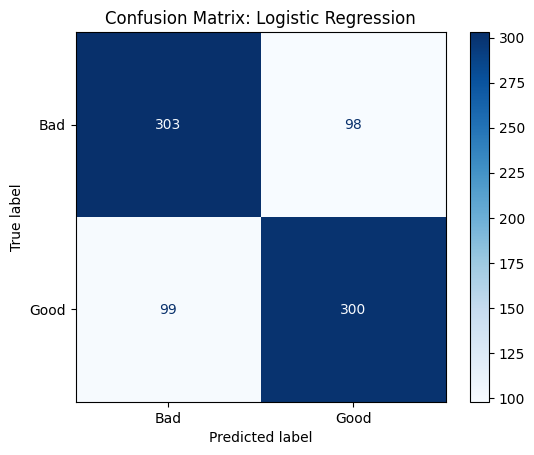

Confusion Matrix:
 [[303  98]
 [ 99 300]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad", "Good"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Print confusion matrix for reference
print("Confusion Matrix:\n", cm)

#### Matrix Breakdown:
- **True Negatives (TN)**: 303
  - The model correctly predicted 303 apples as `Bad` quality.
- **False Positives (FP)**: 98
  - The model incorrectly predicted 98 `Bad` apples as `Good`.
- **False Negatives (FN)**: 99
  - The model incorrectly predicted 99 `Good` apples as `Bad`.
- **True Positives (TP)**: 300
  - The model correctly predicted 300 apples as `Good` quality.

#### Key Observations:
1. **Balanced Correct Predictions**:<br>
   The model performs evenly in predicting both `Good` and `Bad` apples, with slightly more true negatives (303) than true positives (300).

2. **Misclassification Rates**:
   - **False Positive Rate** (FP): 98 where bad apples were classified as `Good`.
   - **False Negative Rate** (FN): 99 where good apples were classified as `Bad`.

### Interpretation
### Findings from Logistic Regression

1. **Overall Accuracy:**<br>
  The logistic regression model reached an accuracy of 75%, rightfully sorting 603 out of 800 samples. This shows the model works somewhat well at guessing apple quality using the given features.

2. **Performance on Each Class꞉**<br>
  The model works equally on `Good` and `Bad` apples, with 300 true positives (Good) and 303 true negatives (Bad). But, the model wrongly labeled 99 good apples as bad (false negatives) and 98 bad apples as good (false positives).

3. **Balanced Performance꞉**<br>
  The nearly equal number of false positives (98) and false negatives (99) points out that the model does not lean towards either class. This reveals a balanced work for a binary classification task.

4. **Limitations꞉**<br>
  The false negative rate (good apples seen as bad) may cause issues in some areas, like quality control, where not spotting good products might lead to financial losses. In the same way, false positives (bad apples seen as good) could also cause issues.

## Comparison, Analysis & Conclusions

### Linear Regression

#### Best Predictor
- **Ripeness** emerged as the top predictor of `Quality` with an \( r \)-value of **0.258**.  
- This weak positive correlation indicates that while `Ripeness` influences `Quality`, it is not a strong standalone predictor.

#### Scatter Plot Observations
- A **negative slope** was observed in the regression line.  
- This suggests an unexpected trend where higher `Ripeness` values might be associated with a lower likelihood of apples being classified as "Good" quality.  
- Given that `Quality` is a binary variable, linear regression assumptions (e.g., continuous target variable) do not fully apply, limiting its effectiveness.

### Logistic Regression

#### Accuracy
- The logistic regression model achieved an accuracy of **75%**, correctly classifying most apples as "Good" or "Bad."

#### Confusion Matrix Observations
- **True Positives (Good)**: 300 apples correctly classified as "Good."  
- **True Negatives (Bad)**: 303 apples correctly classified as "Bad."  
- **False Positives**: 98 "Bad" apples misclassified as "Good."  
- **False Negatives**: 99 "Good" apples misclassified as "Bad."  

#### Balanced Performance
- The logistic regression model demonstrated **balanced performance** across both classes, effectively handling the binary nature of the classification task.  
- It outperformed linear regression, as it is better suited for yes-or-no classification problems like predicting `Quality`.


Comparison of Linear and Logistic Regression

| Aspect            | Linear Regression                             | Logistic Regression                         |
|------------------------|--------------------------------------------------|------------------------------------------------|
| Purpose           | Predicts a continuous target variable.           | Classifies data into discrete categories.      |
| Target Variable   | Uses a continuous target variable.               | Works with binary or multiclass target variables. |
| Model Output      | Produces a continuous numerical value (\( y \)).  | Gives probabilities (\( $P(y=1|X)$ \)).       |
| Best Use Case     | Fits well for regression problems like housing prices.       | Suitable for classification problems like spam detection.|
| Performance       | Showed poor results for binary classification due to weak connection and wrongness for binary targets. | Reached 75% accuracy with good balance, making it more suitable for this task. |
| Interpretability  | Easy to understand with a linear equation.         | Provides probabilities and clear decision points. |
| Limitations       | Needs linearity and a continuous target variable; really not suitable for binary data. | Assumes linear connection between factors and log-odds; less effective with non-linear links. |

### Conclusion

#### Comparing the Models:
Logistic Regression outperformed Linear Regression for this binary classification task due to its ability to:
- Define clear decision boundaries.
- Provide probabilistic predictions for classifying apples as "Good" or "Bad."

While Linear Regression demonstrated strengths, such as identifying `Ripeness` as a key factor, it struggled with the binary nature of the target variable. This made its results more difficult to interpret and less effective for classification.

#### The Role of Ripeness:
Both models confirmed that `Ripeness` is an important factor influencing apple quality. However, its weak correlation with `Quality` suggests that it is insufficient as a standalone predicting element. Combining `Ripeness` with other features could likely improve the model's predictions.

#### Insights:
Logistic Regression was the better model for this task because it provided:
- Balanced and interpretable results suitable for binary classification.
- A confusion matrix that demonstrated its ability to handle both "Good" and "Bad" classifications effectively, without bias toward either class.

#### Summary:
Logistic Regression stands out as the most suitable model for this classification problem, given its alignment with the binary nature of the task and its balanced performance. Linear Regression, while insightful for exploring relationships like the importance of `Ripeness`, falls short in providing the level of detail needed for accurate classification.

### Recommendations for Future Work:
1. **Feature Engineering**:
   - Combine or transform existing features (e.g., interaction terms) to capture more complex relationships in the data.
2. **Experiment with Advanced Models**:
   - Evaluate more sophisticated machine learning algorithms, such as **Random Forests** or **Support Vector Machines**, to improve classification accuracy.
3. **Address Class Imbalance**:
   - If the dataset is imbalanced (e.g., more "Good" apples than "Bad"), consider applying data augmentation techniques or re-sampling strategies to balance the classes and reduce misclassification errors.

By taking these steps, the model's performance and reliability can be further enhanced for practical applications.
